In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential 


In [2]:
#Loading the dataset
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

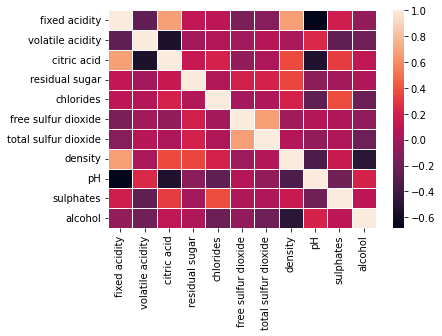

In [5]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5)

In [6]:
label_encoder =LabelEncoder()
df['quality']= label_encoder.fit_transform(df['quality'])
print(label_encoder.inverse_transform((0,1)))
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

['bad' 'good']


In [7]:
#Implementing cross validation 
n=10
kf = KFold(n_splits=n, random_state=None)

In [8]:
def evaluation_metrics(tp,tn,fp,fn):
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    precision = tp / (tp+fp)
    recall= tp / (tp+fn)
    tp_rate = tp/(tp+fn)
    tn_rate = tn/(tn+fp)
    fp_rate = fp/(tn+fp)
    fn_rate = fn/(tp+fn)
    f1_measure = 2*(precision*recall)/(precision+recall)
    error_rate = (fp+fn)/(tp+tn+fp+fn)
    balance_accuracy = (tp_rate + tn_rate)/2
    TSS = (tp/(tp+fn))-(fp/(fp+tn))
    HSS = (2*((tp*tn)-(fp*fn)))/((tp+fn)*(fn+tn)+(fp+tp)*(fp+tn))
    return tp_rate,tn_rate,fp_rate,fn_rate,accuracy,precision,recall,f1_measure,error_rate,balance_accuracy,TSS,HSS
          



def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
    positive = true_positive + false_negative
    negative = true_negative + false_positive
    print("Fold Size = ",positive+negative)
    print("The total positive = ",positive)
    print("The total negative = ",negative)
    confusion_matrix_res = [[true_negative, false_negative],[false_positive,true_positive]]
    print("Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] = ",confusion_matrix_res)
    return true_positive,true_negative,false_positive,false_negative

## KNN

In [9]:
modelknn = KNeighborsClassifier(n_neighbors=2)
count=0
accuracy = [None] * 10
precision = [None] * 10
recall= [None] * 10
tp_rate = [None] * 10
tn_rate = [None] * 10
fp_rate = [None] * 10
fn_rate = [None] * 10
f1_measure = [None] * 10
error_rate = [None] * 10
balance_accuracy = [None] * 10
TSS = [None] * 10
HSS = [None] * 10
    
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelknn.fit(X_train,y_train)
    pred_values = modelknn.predict(X_test)
    print("Fold = ",count+1)
    tp,tn,fp,fn=confusion_matrix(y_test,pred_values)
    tp_rate[count],tn_rate[count],fp_rate[count],fn_rate[count],accuracy[count],precision[count],recall[count],f1_measure[count],error_rate[count],balance_accuracy[count],TSS[count],HSS[count] = evaluation_metrics(tp,tn,fp,fn)
    print("True Positive rate = ",tp_rate[count])
    print("True Negative rate = ",tn_rate[count])
    print("False Positive rate = ",fp_rate[count])
    print("False negative rate = ",fn_rate[count])
    print("Accuracy = ",accuracy[count])
    print("Precision = ",precision[count])
    print("Recall = ",recall[count])
    print("F1 Measure = ",f1_measure[count])
    print("Error rate = ",error_rate[count])
    print("Balanced Accuracy = ",balance_accuracy[count])
    print("True Skill statistics = ",TSS[count])
    print("Heidke Skill Score = ",HSS[count])
 
    print("-"*100)
    count+=1
    
print("*"*100)
print("Average True Positive rate = ",sum(tp_rate)/n)
print("Average True Negative rate = ",sum(tn_rate)/n)
print("Average False Positive rate = ",sum(fp_rate)/n)
print("Average False negative rate = ",sum(fn_rate)/n)
print("Average Accuracy = ", sum(accuracy)/n)
print("Average Precision = ",sum(precision)/n)
print("Average Recall = ",sum(recall)/n)
print("Average F1 Measure = ",sum(f1_measure)/n)
print("Average Error rate = ",sum(error_rate)/n)
print("Average Balanced Accuracy = ",sum(balance_accuracy)/n)
print("Average True Skill statistics = ",sum(TSS)/n)
print("Average Heidke Skill Score = ",sum(HSS)/n)
print("*"*100)


Fold =  1
Fold Size =  160
The total positive =  47
The total negative =  113
Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] =  [[106, 33], [7, 14]]
True Positive rate =  0.2978723404255319
True Negative rate =  0.9380530973451328
False Positive rate =  0.061946902654867256
False negative rate =  0.7021276595744681
Accuracy =  0.75
Precision =  0.6666666666666666
Recall =  0.2978723404255319
F1 Measure =  0.4117647058823529
Error rate =  0.25
Balanced Accuracy =  0.6179627188853323
True Skill statistics =  0.23592543777066466
Heidke Skill Score =  0.28138333707612845
----------------------------------------------------------------------------------------------------
Fold =  2
Fold Size =  160
The total positive =  78
The total negative =  82
Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] =  [[72, 53], [10, 25]]
True Positive rate =  0.32051282051282054
True Negative rate =  0.8780487804878049
False Positive rate 

## Random forest

In [10]:
#Random forest algorithm
modelrf = RandomForestClassifier()
count=0
accuracy = [None] * 10
precision = [None] * 10
recall= [None] * 10
tp_rate = [None] * 10
tn_rate = [None] * 10
fp_rate = [None] * 10
fn_rate = [None] * 10
f1_measure = [None] * 10
error_rate = [None] * 10
balance_accuracy = [None] * 10
TSS = [None] * 10
HSS = [None] * 10

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelrf.fit(X_train,y_train)
    pred_values = modelrf.predict(X_test)
    
    print("Fold = ",count+1)
    tp,tn,fp,fn=confusion_matrix(y_test,pred_values)
    tp_rate[count],tn_rate[count],fp_rate[count],fn_rate[count],accuracy[count],precision[count],recall[count],f1_measure[count],error_rate[count],balance_accuracy[count],TSS[count],HSS[count] = evaluation_metrics(tp,tn,fp,fn)
    print("True Positive rate = ",tp_rate[count])
    print("True Negative rate = ",tn_rate[count])
    print("False Positive rate = ",fp_rate[count])
    print("False negative rate = ",fn_rate[count])
    print("Accuracy = ",accuracy[count])
    print("Precision = ",precision[count])
    print("Recall = ",recall[count])
    print("F1 Measure = ",f1_measure[count])
    print("Error rate = ",error_rate[count])
    print("Balanced Accuracy = ",balance_accuracy[count])
    print("True Skill statistics = ",TSS[count])
    print("Heidke Skill Score = ",HSS[count])
 
    print("-"*100)
    count+=1
    
print("*"*100)
print("Average True Positive rate = ",sum(tp_rate)/n)
print("Average True Negative rate = ",sum(tn_rate)/n)
print("Average False Positive rate = ",sum(fp_rate)/n)
print("Average False negative rate = ",sum(fn_rate)/n)
print("Average Accuracy = ", sum(accuracy)/n)
print("Average Precision = ",sum(precision)/n)
print("Average Recall = ",sum(recall)/n)
print("Average F1 Measure = ",sum(f1_measure)/n)
print("Average Error rate = ",sum(error_rate)/n)
print("Average Balanced Accuracy = ",sum(balance_accuracy)/n)
print("Average True Skill statistics = ",sum(TSS)/n)
print("Average Heidke Skill Score = ",sum(HSS)/n)
print("*"*100)


Fold =  1
Fold Size =  160
The total positive =  47
The total negative =  113
Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] =  [[95, 26], [18, 21]]
True Positive rate =  0.44680851063829785
True Negative rate =  0.8407079646017699
False Positive rate =  0.1592920353982301
False negative rate =  0.5531914893617021
Accuracy =  0.725
Precision =  0.5384615384615384
Recall =  0.44680851063829785
F1 Measure =  0.4883720930232558
Error rate =  0.275
Balanced Accuracy =  0.6437582376200339
True Skill statistics =  0.28751647524006774
Heidke Skill Score =  0.30255597384584904
----------------------------------------------------------------------------------------------------
Fold =  2
Fold Size =  160
The total positive =  78
The total negative =  82
Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] =  [[71, 35], [11, 43]]
True Positive rate =  0.5512820512820513
True Negative rate =  0.8658536585365854
False Positive rate

## LSTM    

In [11]:
count=0
accuracy = [None] * 10
precision = [None] * 10
recall= [None] * 10
tp_rate = [None] * 10
tn_rate = [None] * 10
fp_rate = [None] * 10
fn_rate = [None] * 10
f1_measure = [None] * 10
error_rate = [None] * 10
balance_accuracy = [None] * 10
TSS = [None] * 10
HSS = [None] * 10

lst = Sequential()
lst.add(LSTM(units=9, input_shape=(X_train.shape[1],1)))
lst.add(Dense(16,activation='tanh'))
lst.add(Dense(1, activation='sigmoid'))
lst.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    X_train=X_train.to_numpy()
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
    y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
    

    lst.fit(X_train, y_train,epochs=5, batch_size=160)
    X_test=X_test.to_numpy()
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    ypred=lst.predict(X_test) 

    for i in range(len(ypred)):
        if ypred[i]>=0.5250:
            ypred[i]=1
        elif ypred[i]<0.5250:
            ypred[i]=0
    
    print("Fold = ",count+1)
    tp,tn,fp,fn=confusion_matrix(y_test,ypred)
    tp_rate[count],tn_rate[count],fp_rate[count],fn_rate[count],accuracy[count],precision[count],recall[count],f1_measure[count],error_rate[count],balance_accuracy[count],TSS[count],HSS[count] = evaluation_metrics(tp,tn,fp,fn)
    print("True Positive rate = ",tp_rate[count])
    print("True Negative rate = ",tn_rate[count])
    print("False Positive rate = ",fp_rate[count])
    print("False negative rate = ",fn_rate[count])
    print("Accuracy = ",accuracy[count])
    print("Precision = ",precision[count])
    print("Recall = ",recall[count])
    print("F1 Measure = ",f1_measure[count])
    print("Error rate = ",error_rate[count])
    print("Balanced Accuracy = ",balance_accuracy[count])
    print("True Skill statistics = ",TSS[count])
    print("Heidke Skill Score = ",HSS[count])
 
    print("-"*100)
    count+=1
    
print("*"*100)
print("Average True Positive rate = ",sum(tp_rate)/n)
print("Average True Negative rate = ",sum(tn_rate)/n)
print("Average False Positive rate = ",sum(fp_rate)/n)
print("Average False negative rate = ",sum(fn_rate)/n)
print("Average Accuracy = ", sum(accuracy)/n)
print("Average Precision = ",sum(precision)/n)
print("Average Recall = ",sum(recall)/n)
print("Average F1 Measure = ",sum(f1_measure)/n)
print("Average Error rate = ",sum(error_rate)/n)
print("Average Balanced Accuracy = ",sum(balance_accuracy)/n)
print("Average True Skill statistics = ",sum(TSS)/n)
print("Average Heidke Skill Score = ",sum(HSS)/n)
print("*"*100)


Epoch 1/5
9/9 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5615
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5615
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5615
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5615
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5615
Fold =  1
Fold Size =  160
The total positive =  47
The total negative =  113
Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] =  [[0, 0], [113, 47]]
True Positive rate =  1.0
True Negative rate =  0.0
False Positive rate =  1.0
False negative rate =  0.0
Accuracy =  0.29375
Precision =  0.29375
Recall =  1.0
F1 Measure =  0.45410628019323673
Error rate =  0.70625
Balanced Accuracy =  0.5
True Skill statistics =  0.0
Heidke Skill Score =  0.0
-------------------------------------------

9/9 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7123
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.7040
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6970
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6935
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6949
Fold =  8
Fold Size =  160
The total positive =  106
The total negative =  54
Confusion Matrix : [[true_negative, false_negative],[false_positive,true_positive]] =  [[31, 21], [23, 85]]
True Positive rate =  0.8018867924528302
True Negative rate =  0.5740740740740741
False Positive rate =  0.42592592592592593
False negative rate =  0.19811320754716982
Accuracy =  0.725
Precision =  0.7870370370370371
Recall =  0.8018867924528302
F1 Measure =  0.794392523364486
Error rate =  0.275
Balanced Accuracy =  0.6879804332634522
True Skill